In [1]:
from importlib import reload

In [2]:
from bowzer import predict
from bowzer import data

reload(data)
reload(predict)

<module 'bowzer.predict' from '/Volumes/KCQDrive/projects/bowzer_drive/bowzer/predict.py'>

In [6]:
path = '/Volumes/KCQDrive/projects/bowzer/runs/trainer_20241019/model_075938_final'
model = predict.Bowzer(path)

In [8]:
cast_image_paths = [f"/Volumes/KCQDrive/projects/images/{name}.jpg" for name in ['paul_rudd','puggle','jason_segel']]
cast_image_paths

['/Volumes/KCQDrive/projects/images/paul_rudd.jpg',
 '/Volumes/KCQDrive/projects/images/puggle.jpg',
 '/Volumes/KCQDrive/projects/images/jason_segel.jpg']

/Volumes/KCQDrive/projects/images/paul_rudd.jpg -> American Pit Bull Terrier
/Volumes/KCQDrive/projects/images/puggle.jpg -> Beagle
/Volumes/KCQDrive/projects/images/jason_segel.jpg -> Japanese Chin


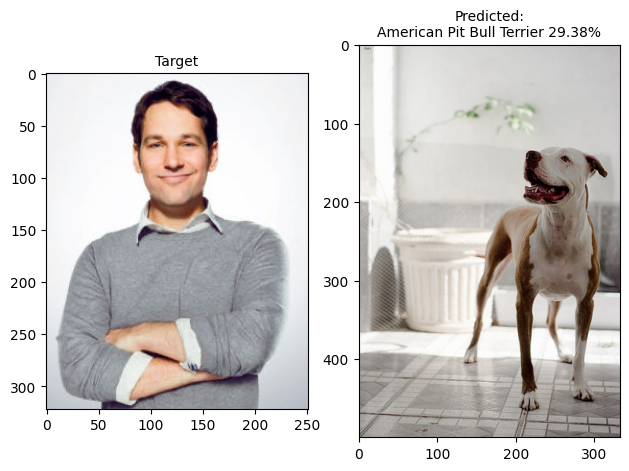

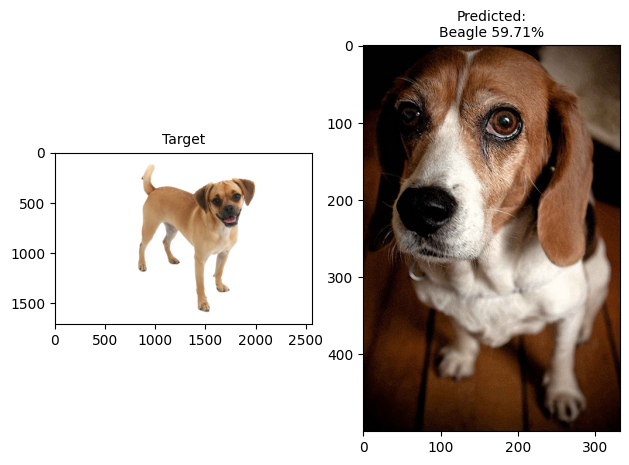

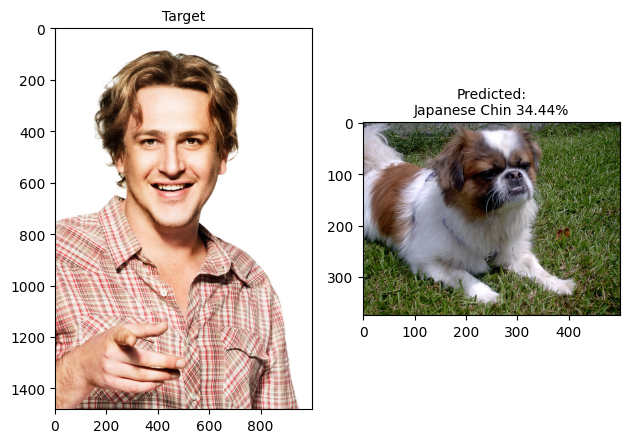

In [9]:
results = model.generate_predictions(cast_image_paths)

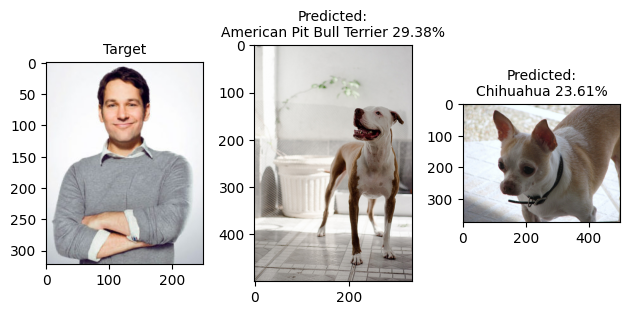

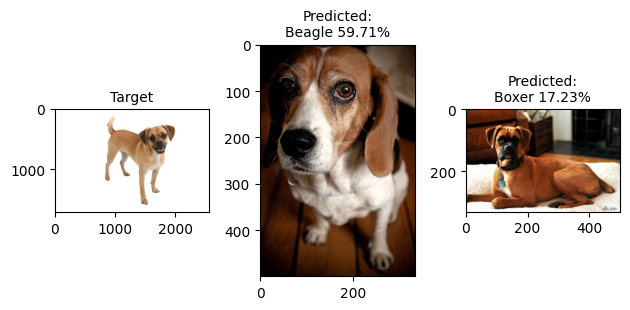

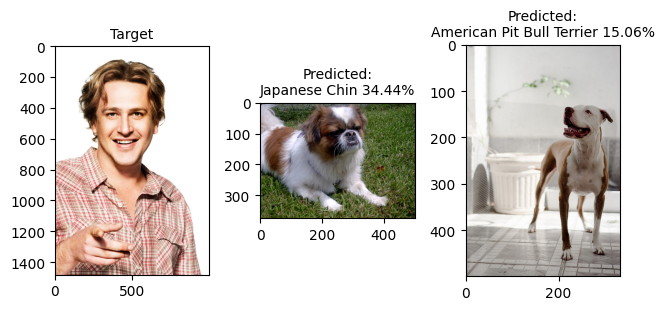

In [10]:
model.show_predicted_images(results, top_n=2)